## Vibration of Single Degree of Freedom systems with damping

Jupyter notebook for numerical solution of a **damped single degree of freedom system** using Euler's method for the equation:

$
\begin{align}
&m\ddot{x}\ + c\dot{x} + kx = 0 \\
&m=5kg \quad k=30000 N/m \quad c=50 \\
\end{align}
$

With the initial conditions 
$
\begin{align}
&x(t=0)=0.05 \quad\text{and}\quad\dot{x}(t=0)=0
\end{align}
$

To find the solution using Euler's method, let $\dot{x} = z$ and $\ddot{x} = \dot{z} $

Set the initial conditions to $ x(0)=0.05$ and $\ddot{x}(t=0) = \dot{z}(t=0) = 0 $

The equation can be writen:

$m\dot{z}\ + cz + kx = 0$

Two sets of equaitons are obtained as follows:

- $ m\dot{z}\ + cz + kx = 0  \quad, \quad z(t=0)=0$
- $ \dot{x} = z\quad, \quad x(t=0) = 0.05 $

Make $\dot{z}$ and $\dot{x}$ the subject of the equations to get the gradient function

$
\begin{align}
f_1 &= \dot{z} = -\left( \frac{cz + kx}{m} \right) \\
f_2 &= \dot{x} = z
\end{align}
$

Applying Euler's Method

$
\begin{align}
z_{i+1} &= z_i + f_1(x_i, z_i, t_i)h = z - \left( \frac{cz + kx}{m} \right) h \\
x_{i+1} &= x_i + f_2(x_i, z_i, t_i)h = x_i + z_i h
\end{align}
$

In [1]:
# The class SDOFOscillator implements the Euler's Method
from pvibrations import SDOFOscillator

import matplotlib.pyplot as plt
# Imports to enable scaled vector graphics
# %matplotlib notebook
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In the cell below, **h** is the variable determinig the timestep. Smaller timesteps give approximations close to the analytical solution. The **time_duration** parameter represents long the vibration will take place after it is started by providing initial conditions

In [2]:
duration = 0.3
# Using a large timestep
tstep = 0.001
oscillator_one = SDOFOscillator(m=5, c=50, k=30000, h=tstep, time_duration=duration)
oscillator_one.set_title(f"One Degree of Freedom System h = {tstep}")
oscillator_one.compute_analytical()
oscillator_one.compute_euler()

# Using a small timestep
tstep = 0.0001
oscillator_two = SDOFOscillator(m=5, c=50, k=30000, h=tstep, time_duration=duration)
oscillator_two.set_title(f"One Degree of Freedom System h = {tstep}")
oscillator_two.compute_analytical()
oscillator_two.compute_euler()

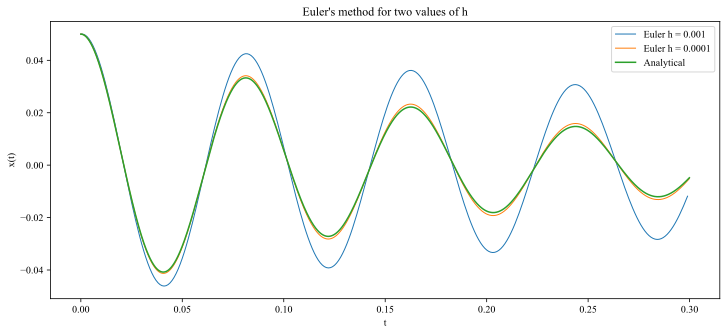

In [3]:
plt.figure(figsize=(12, 5))
plt.rcParams["font.family"] = 'Times New Roman'
plt.title("Euler's method for two values of h")
plt.plot(oscillator_one.get_t(),  oscillator_one.get_x(), label=f"Euler h = {oscillator_one.get_h()}",linewidth=1)
plt.plot(oscillator_two.get_t(),  oscillator_two.get_x(), label=f"Euler h = {oscillator_two.get_h()}",linewidth=1)
plt.plot(oscillator_one.get_time_true(), oscillator_one.get_x_true(), label='Analytical',linewidth=1.5)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.show()